In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
rng = np.random.default_rng()

def mutual_information(X, Y, bins=2):
    pX = np.histogram(X, bins=bins)[0]
    pX = pX[pX > 0] / np.sum(pX)
    hX = -np.sum(np.log2(pX) * pX)

    pY = np.histogram(Y, bins=bins)[0]
    pY = pY[pY > 0] / np.sum(pY)
    hY = -np.sum(np.log2(pY) * pY)

    pXY = np.histogram2d(X, Y, bins=bins)[0]
    pXY = pXY[pXY > 0] / np.sum(pXY)
    hXY = -np.sum(np.log2(pXY) * pXY)
    
    return hX + hY - hXY

In [10]:
# defines detail of the sampling space
nlin = 70

# joint domain of the random variables
x1 = [1, -1, 0, 0]
x2 = [0, 0, 1, -1]
print("x1 = {}\nx2 = {}".format(x1, x2))

x1 = [1, -1, 0, 0]
x2 = [0, 0, 1, -1]


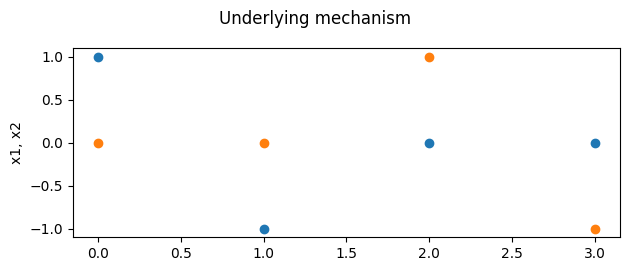

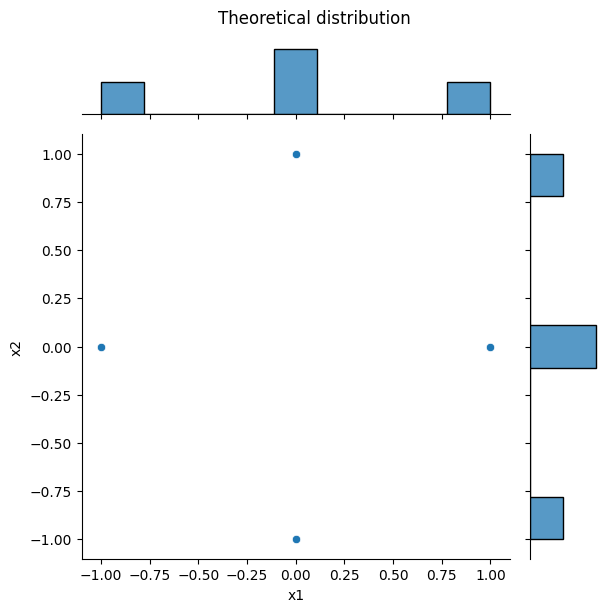

In [5]:
# visualize theoretical

t = range(len(x1))

plt.figure()
plt.subplot(211)
plt.scatter(t, x1)
plt.scatter(t, x2)
plt.ylabel("x1, x2")
plt.suptitle("Underlying mechanism")
plt.tight_layout()

sns.jointplot(x=x1, y=x2, marginal_kws=dict(bins=9))
plt.suptitle("Theoretical distribution")
plt.tight_layout()
plt.xlabel("x1")
plt.ylabel("x2");

      rho        I
-0.001705 0.999711


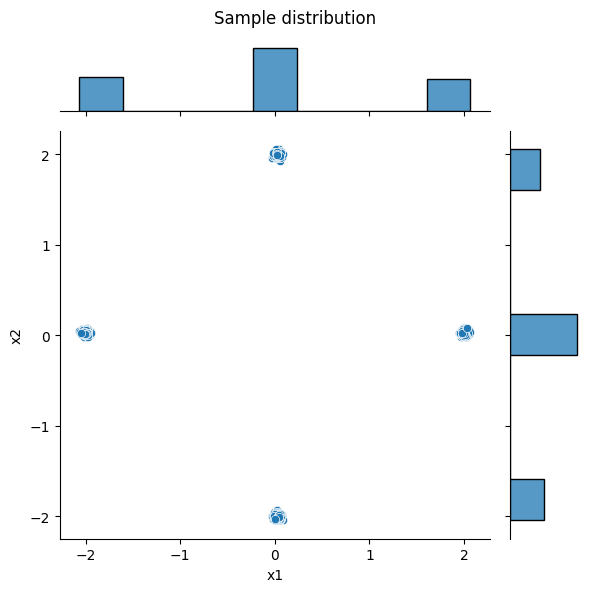

In [6]:
# compute theoretical distribution
pXY = np.histogram2d(x1, x2, bins=nlin)[0]
pXY /= np.sum(pXY)
cs = np.cumsum(pXY.flat)

sampleX, sampleY = np.linspace(min(x1), max(x1), nlin), np.linspace(min(x2), max(x2), nlin)
nsample = 1000

# sample from the theoretical distribution
sx, sy = np.zeros([2, nsample])
for i in range(nsample):
    k = np.where(rng.uniform() < cs)[0][0]
    r, c = np.unravel_index(k, [nlin, nlin])
    sx[i], sy[i] = sampleX[r], sampleY[c] 


#  (jitter for visualization purposes)
sns.jointplot(x=sx + rng.normal(sx, 0.02), y=sy + rng.normal(sy, 0.02), marginal_kws=dict(bins=9))
plt.suptitle("Sample distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

# compute Pearson and MI from sample
rho, I = stats.pearsonr(sx, sy).statistic, mutual_information(sx, sy, bins=nlin)
print(pd.DataFrame(dict(rho=[rho], I=[I])).to_string(index=False))
